In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'lib')))
from renormalization import rg_step, required_initial_max_distance, construct_transfer_matrix
from utils import build_J

In [7]:
def generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=False, TM_r=1):

    D0 = required_initial_max_distance(max_dist_final, n_steps)
    J = build_J(J0, a, D0)

    J_list = [J.copy()]
    TM_list = [] if trace_TM else None

    for step in range(n_steps + 1):

        if trace_TM and TM_r < len(J):
            T = construct_transfer_matrix(J, TM_r, normalize=True)
            TM_list.append(T)

        if step == n_steps:
            break

        J = rg_step(J)
        J_list.append(J.copy())

    return J_list, TM_list


def extract_flows(J_list, max_dist_final):

    n_steps_plus_1 = len(J_list)
    flows = np.zeros((n_steps_plus_1, max_dist_final + 1), dtype=float)
    for step, J in enumerate(J_list):
        D_curr = len(J) - 1
        r_max_record = min(max_dist_final, D_curr)
        flows[step, :r_max_record + 1] = J[:r_max_record + 1]

    return flows


def plot_rg_flow(flows, distances_to_plot=None):

    n_steps_plus_1, max_dist_plus_1 = flows.shape
    max_dist = max_dist_plus_1 - 1
    steps = np.arange(n_steps_plus_1)

    if distances_to_plot is None:
        distances_to_plot = range(1, max_dist + 1)

    plt.figure(figsize=(7, 5))
    for r in distances_to_plot:
        if 1 <= r <= max_dist:
            plt.plot(steps, flows[:, r], marker='o', label=f"J_{r}")

    plt.xlabel("RG step")
    plt.ylabel("Coupling J_r")
    plt.title("RG flow of couplings")
    plt.legend()
    plt.tight_layout()
    plt.show()

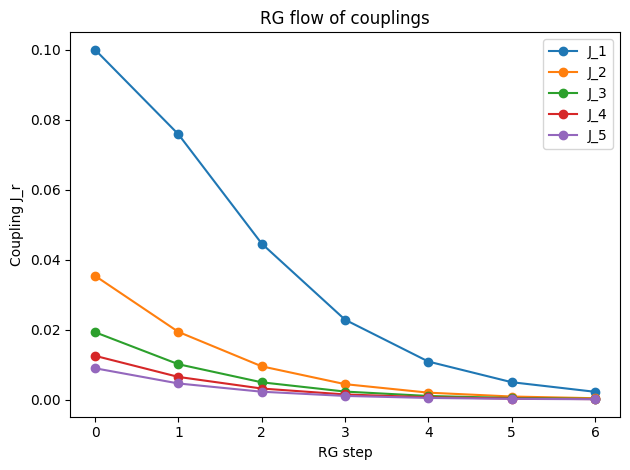


RG step 0:
 [[1.     0.8187]
 [0.8187 1.    ]]

RG step 1:
 [[1.     0.8593]
 [0.8593 1.    ]]

RG step 2:
 [[1.     0.9147]
 [0.9147 1.    ]]

RG step 3:
 [[1.     0.9554]
 [0.9554 1.    ]]

RG step 4:
 [[1.     0.9785]
 [0.9785 1.    ]]

RG step 5:
 [[1.     0.9901]
 [0.9901 1.    ]]

RG step 6:
 [[1.     0.9956]
 [0.9956 1.    ]]


In [8]:
J0 = .1
a = 1.5
max_dist_final = 3**2
n_steps = 6

J_list, T_list = generate_rg_flow(J0, a, max_dist_final, n_steps, trace_TM=True, TM_r=1)
flows = extract_flows(J_list, max_dist_final)
plot_rg_flow(flows, distances_to_plot=[1, 2, 3, 4, 5])

[print(f"\nRG step {i}:\n", np.round(t, 4)) for i, t in enumerate(T_list)];